In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
d5 = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [3]:
d5.shape

(100000, 9)

In [4]:
d5.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
d5.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
d5.duplicated().sum()

3854

In [7]:
d5 = d5.drop_duplicates()

In [8]:
d5.shape

(96146, 9)

In [9]:
d5.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
set(d5.gender)

{'Female', 'Male', 'Other'}

In [12]:
set(d5.smoking_history)

{'No Info', 'current', 'ever', 'former', 'never', 'not current'}

In [13]:
d5.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
d6 = d5[~(d5['smoking_history']=='No Info')]

In [15]:
d6.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
11,Female,54.0,0,0,former,54.70,6.0,100,0


In [16]:
print(d5['diabetes'].value_counts(normalize=True))

diabetes
0    0.91178
1    0.08822
Name: proportion, dtype: float64


In [17]:
print(d6['diabetes'].value_counts(normalize=True))

diabetes
0    0.888759
1    0.111241
Name: proportion, dtype: float64


In [18]:
d6.shape

(63259, 9)

<Axes: xlabel='gender', ylabel='count'>

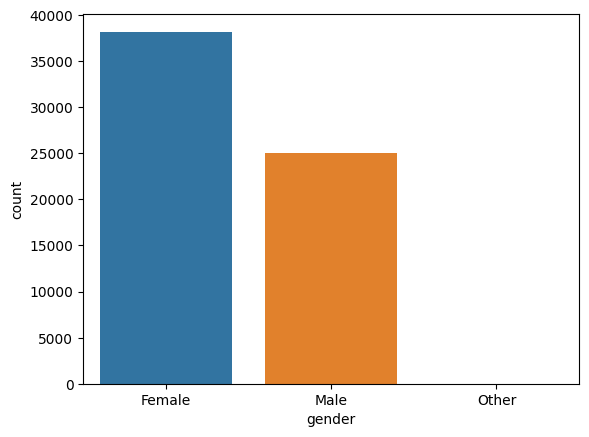

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=d6,x='gender')

In [20]:
d7 = d6[~(d6['gender']=='Other')]

In [21]:
d7.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [22]:
d7.shape

(63247, 9)

In [23]:
d7.duplicated().sum()

0

In [24]:
set(d7.hypertension)

{0, 1}

In [25]:
set(d7.heart_disease)

{0, 1}

In [26]:
set(d7.diabetes)

{0, 1}

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='diabetes'>

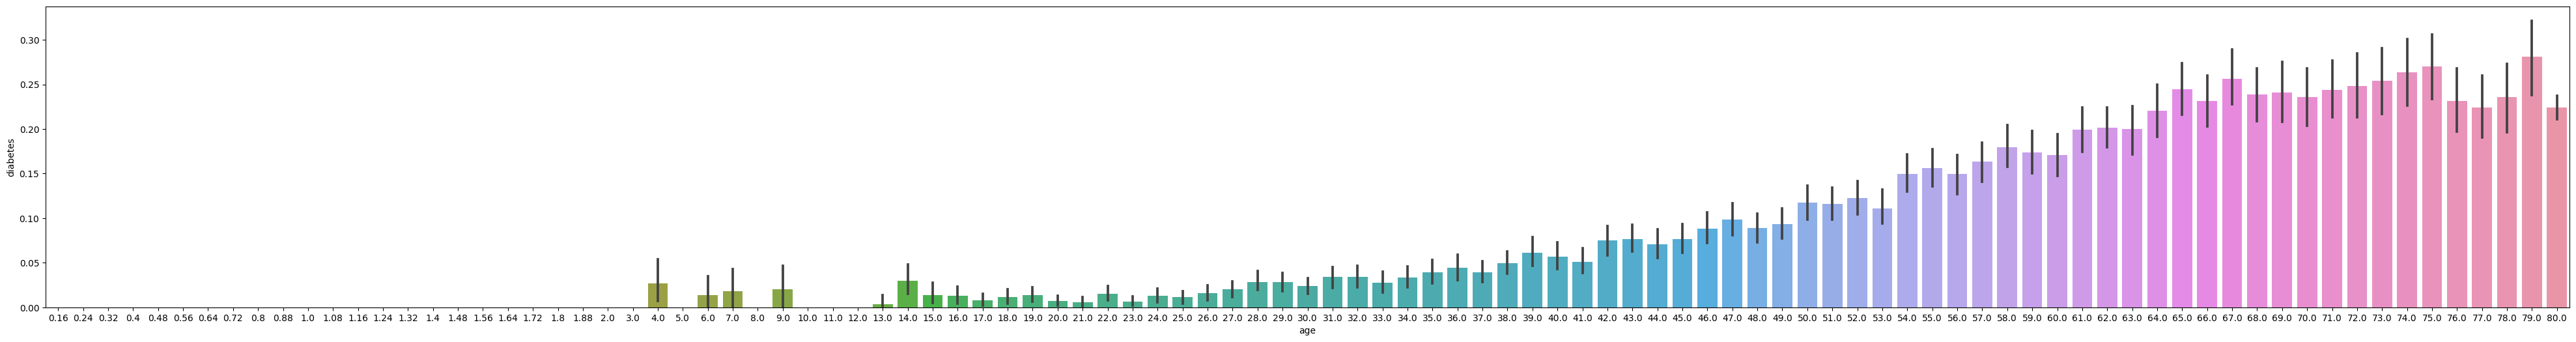

In [28]:
plt.figure(figsize=(50,6))
sns.barplot(x=d7.age,y=d7.diabetes)

<Axes: >

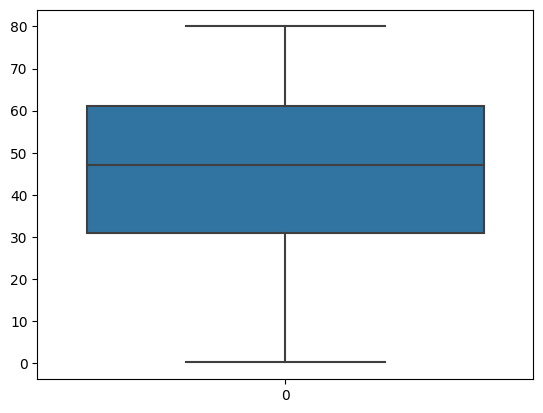

In [29]:
sns.boxplot(d7.age)

In [30]:
d8 = d7[d7['age']>=25]

In [31]:
d8.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


In [32]:
d8.shape

(53354, 9)

<Axes: >

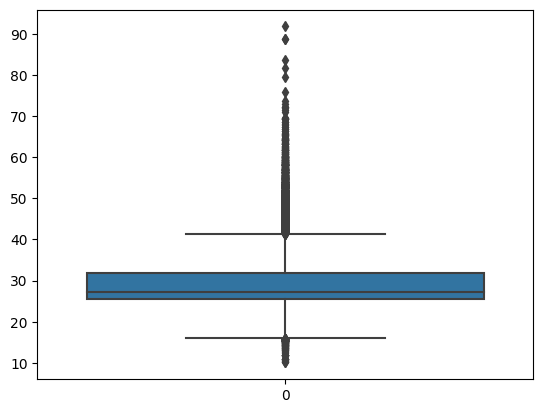

In [33]:
sns.boxplot(d8.bmi)

In [34]:
d9 = d8[(d8['bmi']>=15)&(d8['bmi']<=70)]

<Axes: xlabel='HbA1c_level', ylabel='diabetes'>

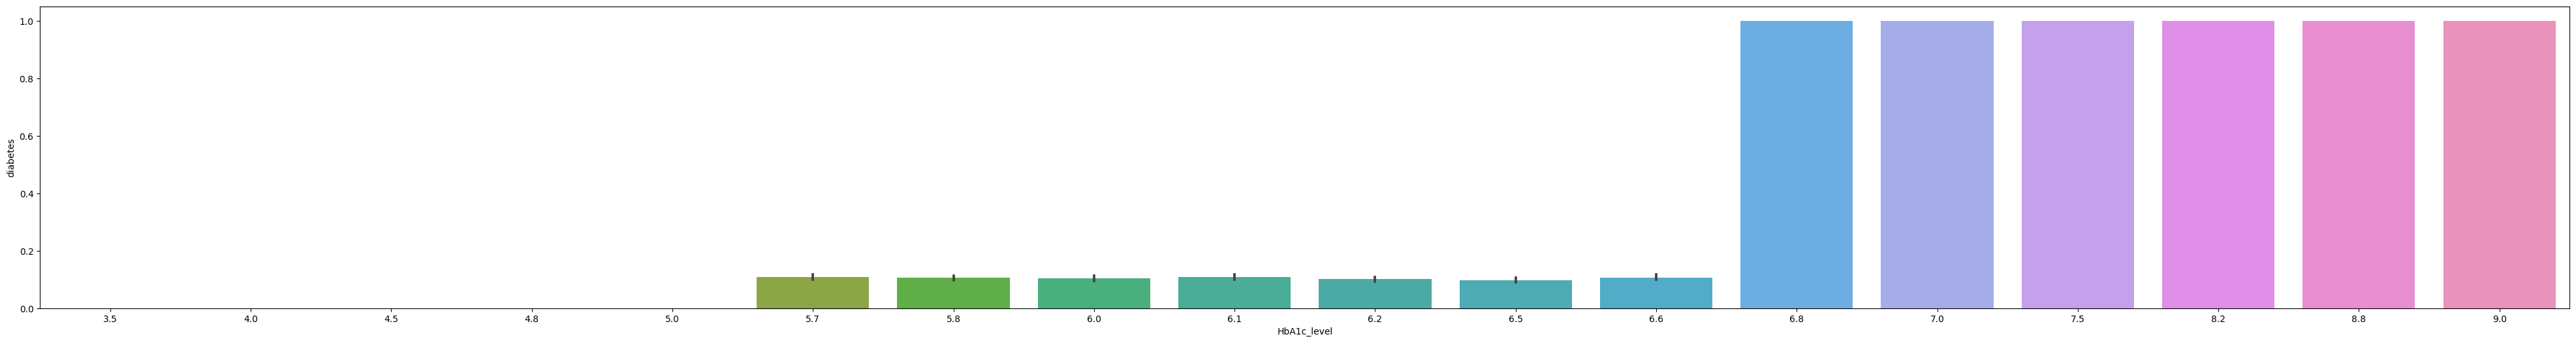

In [35]:
plt.figure(figsize=(50,6))
sns.barplot(x=d7.HbA1c_level,y=d7.diabetes)

<Axes: >

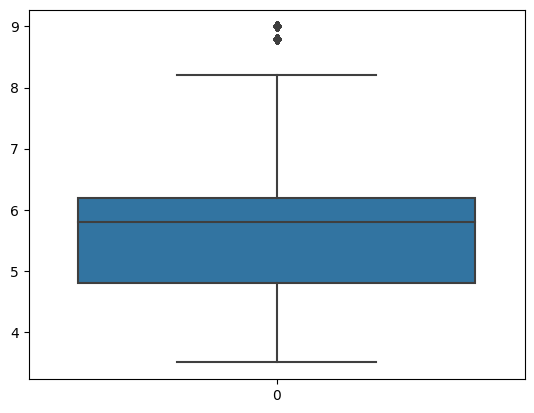

In [36]:
sns.boxplot(d9.HbA1c_level)

In [37]:
d9 = d9[d9['HbA1c_level']<8.5]

<Axes: >

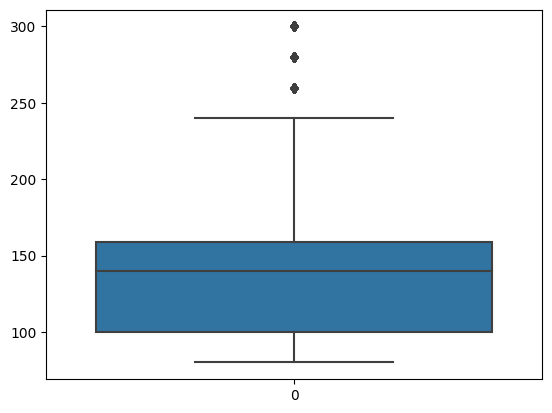

In [38]:
sns.boxplot(d9.blood_glucose_level)	

In [39]:
d9 = d9[d9['blood_glucose_level']<250]

In [40]:
d9.shape

(50841, 9)

In [41]:
d9.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


<Axes: >

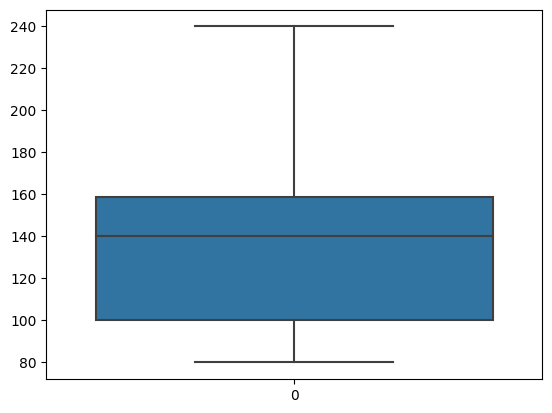

In [42]:
sns.boxplot(d9.blood_glucose_level)	

<Axes: >

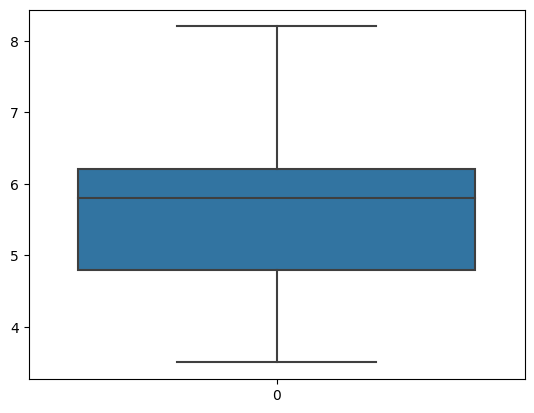

In [43]:
sns.boxplot(d9.HbA1c_level)	

<Axes: >

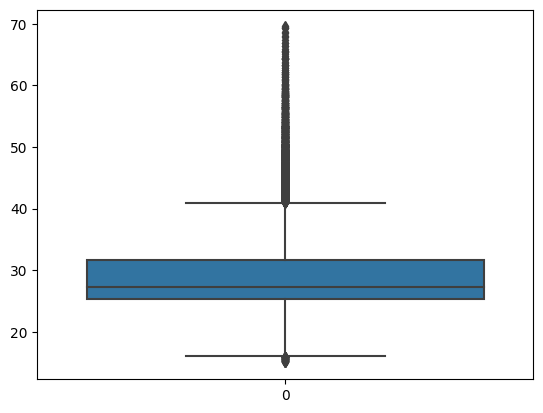

In [44]:
sns.boxplot(d9.bmi)	

In [45]:
print(d9['diabetes'].value_counts(normalize=True))

diabetes
0    0.912177
1    0.087823
Name: proportion, dtype: float64


In [46]:
d9.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,50841.000000,50841.000000,50841.000000,50841.000000,50841.000000,50841.000000,50841.000000
mean,51.561496,0.110069,0.051533,28.992336,5.501332,135.921127,0.087823
std,15.917778,0.312978,0.221085,6.252946,1.009339,35.779770,0.283040
min,25.000000,0.000000,0.000000,15.040000,3.500000,80.000000,0.000000
25%,38.000000,0.000000,0.000000,25.380000,4.800000,100.000000,0.000000
50%,51.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,63.000000,0.000000,0.000000,31.620000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,69.550000,8.200000,240.000000,1.000000


In [47]:
d9.duplicated().sum()

0

In [48]:
d9['diabetes'].value_counts()

diabetes
0    46376
1     4465
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

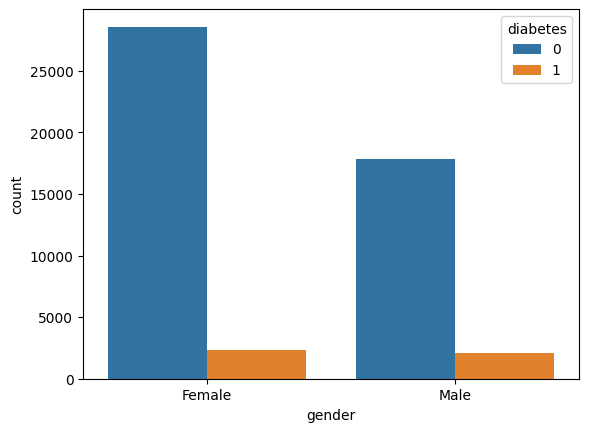

In [49]:
sns.countplot(data=d9,x='gender',hue='diabetes')

In [50]:
d9.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


In [51]:
d10 = pd.get_dummies(d9,columns=['gender','smoking_history'],drop_first=True,dtype=int)

In [52]:
d10.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
6,44.0,0,0,19.31,6.5,200,1,0,0,0,1,0


<Axes: >

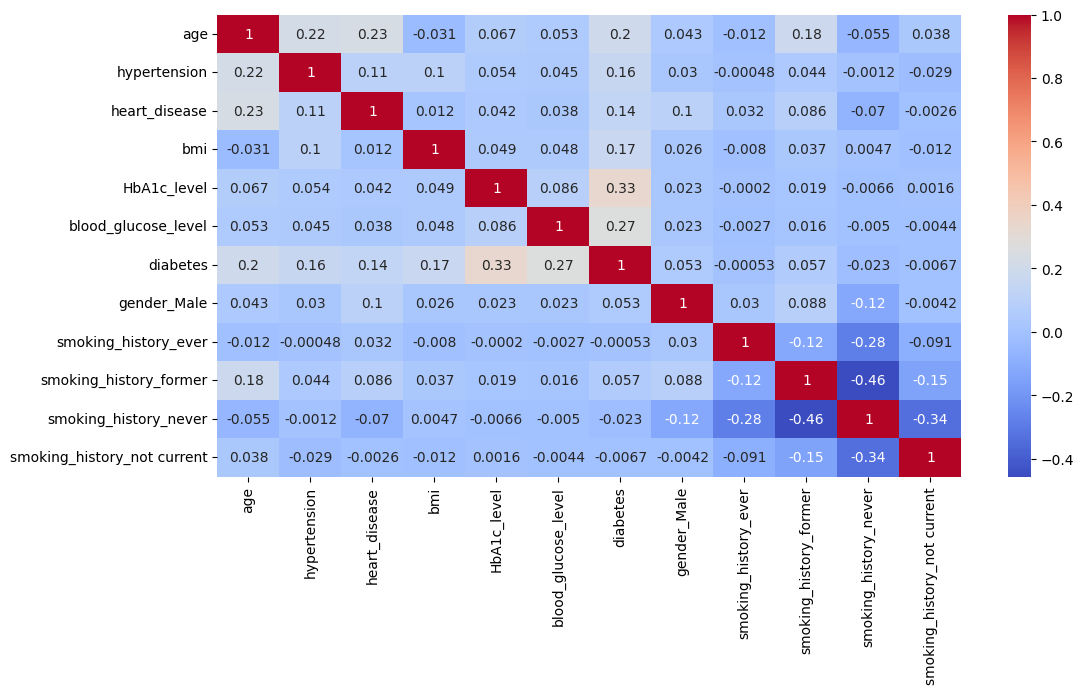

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(d10.corr(),annot=True,cmap="coolwarm")

In [54]:
X = d10.drop('diabetes',axis='columns')
X.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,0,0,0
6,44.0,0,0,19.31,6.5,200,0,0,0,1,0


In [55]:
Y = d10['diabetes']
Y.head(5)

0    0
2    0
3    0
4    0
6    1
Name: diabetes, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 42,stratify=Y)

In [57]:
X_test.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
65611,80.0,0,0,31.39,5.7,100,1,0,0,0,1
56099,46.0,0,0,32.98,3.5,159,1,0,0,1,0
46773,52.0,0,0,30.17,7.5,126,1,0,0,0,0
73995,30.0,0,0,37.87,5.0,145,0,0,0,1,0
56281,63.0,0,0,25.00,6.2,159,0,0,0,1,0


In [58]:
Y_test.head(5)

65611    0
56099    0
46773    1
73995    0
56281    0
Name: diabetes, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [60]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [61]:
y_pred = dtc.predict(X_test)

In [62]:
type(X_test)

pandas.core.frame.DataFrame

In [63]:
type(X_test.iloc[0])

pandas.core.series.Series

In [64]:
import numpy as np
xy = np.array([[52.0,0,0,30.17,7.5,126,1,0,0,0,0]])
print(xy)
print(dtc.predict(xy))

[[ 52.     0.     0.    30.17   7.5  126.     1.     0.     0.     0.
    0.  ]]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [65]:
dtc.score(X_test,Y_test)

0.9212311928409873

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test,y_pred)

In [67]:
accuracy

0.9212311928409873

In [68]:
cm = confusion_matrix(Y_test,y_pred)

In [69]:
cm

array([[8853,  423],
       [ 378,  515]])

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=cv)

In [71]:
cross_val_results

array([0.92536139, 0.9254524 , 0.92496066, 0.91955153, 0.92427223])

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [73]:
rfc.score(X_test,Y_test)

0.9506342806568984

In [74]:
y_pred1=rfc.predict(X_test)

In [75]:
asc =accuracy_score(Y_test,y_pred1) 

In [76]:
asc

0.9506342806568984

In [77]:
cm1 = confusion_matrix(Y_test,y_pred1)

In [78]:
cm1

array([[9227,   49],
       [ 453,  440]])

In [79]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results1 = cross_val_score(RandomForestClassifier(), X, Y, cv=cv1)

In [80]:
cross_val_results1

array([0.95446947, 0.95013769, 0.95033438, 0.95053108, 0.9540716 ])

In [81]:
print("Decision Tree Train: ",dtc.score(X_train,Y_train))
print("Decision Tree Test: ",dtc.score(X_test,Y_test))

Decision Tree Train:  0.9993853265145555
Decision Tree Test:  0.9212311928409873


In [82]:
print("Random Forest Train: ",rfc.score(X_train,Y_train))
print("Random Forest  Test: ",rfc.score(X_test,Y_test))

Random Forest Train:  0.9993853265145555
Random Forest  Test:  0.9506342806568984


In [83]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [84]:
model_param = {
    'svm': {
        'model': SVC(),
        'param': {
            'kernel': ['rbf']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'param': {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param': {
                'n_estimators': [10, 50, 200, 300]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'param': {
            'max_depth': [None, 3, 5, 10] 
        } 
    }
}

In [85]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
scores = []


for name, p in model_param.items():
    gscv = GridSearchCV(p['model'],p['param'],cv=cv,return_train_score=False)
    gscv.fit(X,Y)
    scores.append({
        'model': name,
        'best_score': gscv.best_score_,
        'best_params': gscv.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [88]:
output = pd.DataFrame(scores,columns=['model','best_score','best_params'])
output

,model,best_score,best_params
0,svm,0.923428,{'kernel': 'rbf'}
1,logistic_regression,0.928266,{}
2,random_forest,0.952165,{'n_estimators': 200}
3,decision_tree,0.954466,{'max_depth': 3}


In [89]:
# age	
# hypertension	
# heart_disease	
# bmi	
# HbA1c_level	
# blood_glucose_level	
# diabetes	
# gender_Male	
# smoking_history_ever	
# smoking_history_former	
# smoking_history_never	
# smoking_history_not current

# gender	
# age	
# hypertension	
# heart_disease	
# smoking_history	
# bmi	
# HbA1c_level	
# blood_glucose_level	
# diabetes

In [90]:
final_columns = list(X_train.columns)

In [91]:
final_columns

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_Male',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [92]:
def predict_diabetes(age,ht,hd,bmi,hb,bgl,gender,smoking):
    input_vector = np.zeros(len(final_columns))

    col_index_map = {col: idx for idx, col in enumerate(final_columns)}

    if 'age' in col_index_map:
        input_vector[col_index_map['age']] = age
    if 'hypertension' in col_index_map:
        input_vector[col_index_map['hypertension']] = ht
    if 'heart_disease' in col_index_map:
        input_vector[col_index_map['heart_disease']] = hd
    if 'bmi' in col_index_map:
        input_vector[col_index_map['bmi']] = bmi
    if 'HbA1c_level' in col_index_map:
        input_vector[col_index_map['HbA1c_level']] = hb
    if 'blood_glucose_level' in col_index_map:
        input_vector[col_index_map['blood_glucose_level']] = bgl

    gender_col = f'gender_{gender}'
    if gender_col in col_index_map:
        input_vector[col_index_map[gender_col]] = 1

    smoking_history = f'smoking_history_{smoking}'
    if smoking_history in col_index_map:
        input_vector[col_index_map[smoking_history]] = 1

    input_df = pd.DataFrame([input_vector], columns=final_columns)
 
    return rfc.predict(input_df)[0]

In [93]:
predict_diabetes(80.0,0,0,31.39,5.7,100,'Male','not current')

0

In [94]:
predict_diabetes(30.0,0,0,37.87,5.0,145,'Female','never')

0

In [95]:
predict_diabetes(52.0,0,0,30.17,7.5,126,'Male','current')

1

Text(0.5, 1.0, 'Top feature_importance')

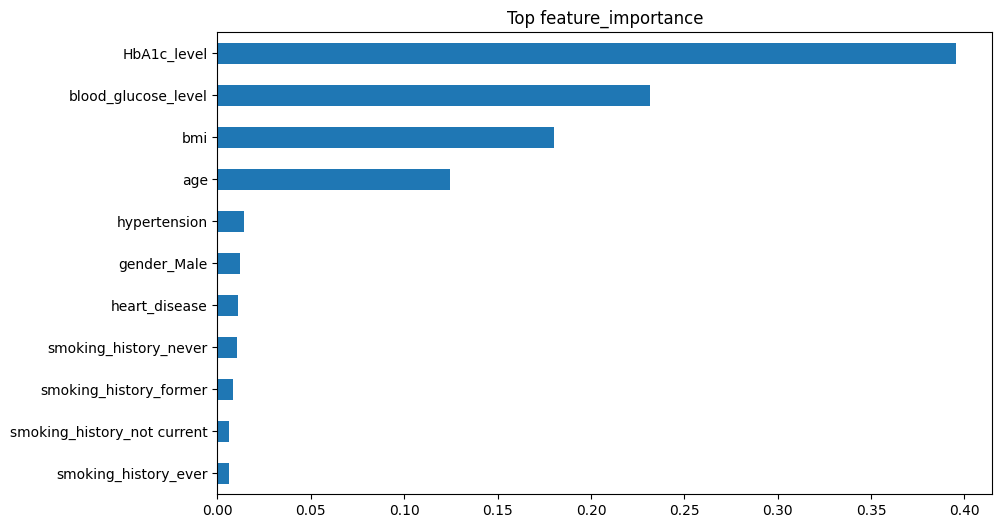

In [96]:
feature_importance = pd.Series(rfc.feature_importances_,index=final_columns)
top_n=20
feature_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh',figsize=(10,6))
plt.title("Top feature_importance")

In [97]:
import pickle
with open('DCM.pickle','wb') as f:
    pickle.dump(rfc,f)

In [98]:
import sklearn
sklearn.__version__

'1.2.2'

In [99]:
import json
columns = { 'data_columns' : [col for col in X.columns] }
with open('columns.json','w') as f:
    f.write(json.dumps(columns))